In [1]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import pandas as pd

In [2]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [4]:
data = pd.read_csv('all_stocks_5yr.csv', parse_dates=True)

In [5]:
sbux = data[data['Name'] == 'SBUX'].copy()
sbux

,date,open,high,low,close,volume,Name
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX
...,...,...,...,...,...,...,...
499406,2018-02-01,56.280,56.420,55.890,56.000,14690146,SBUX
499407,2018-02-02,55.900,56.320,55.700,55.770,15358909,SBUX
499408,2018-02-05,55.530,56.260,54.570,54.690,16059955,SBUX
499409,2018-02-06,53.685,56.060,53.560,55.610,17415065,SBUX


<Axes: >

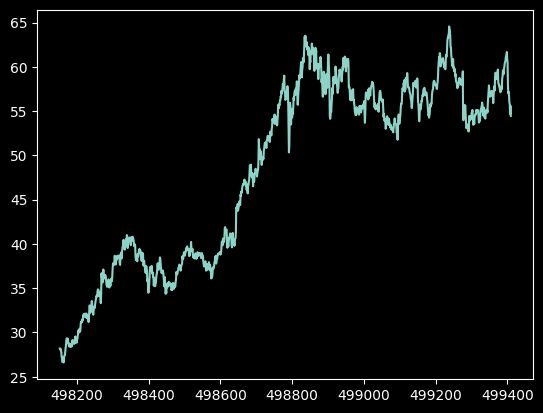

In [6]:
sbux['close'].plot()

In [7]:
sbux['prev_close'] = sbux['close'].shift(1)

In [8]:
sbux.head()

,date,open,high,low,close,volume,Name,prev_close
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915


In [9]:
sbux['return'] = sbux['close'] / sbux['prev_close'] - 1

In [10]:
sbux.head()

,date,open,high,low,close,volume,Name,prev_close,return
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015


In [11]:
sbux['return2'] =  sbux['close'].pct_change()

In [12]:
sbux

,date,open,high,low,close,volume,Name,prev_close,return,return2
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN,NaN
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080,-0.004080
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138,0.002138
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643,-0.007643
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015,-0.005015
...,...,...,...,...,...,...,...,...,...,...
499406,2018-02-01,56.280,56.420,55.890,56.000,14690146,SBUX,56.810,-0.014258,-0.014258
499407,2018-02-02,55.900,56.320,55.700,55.770,15358909,SBUX,56.000,-0.004107,-0.004107
499408,2018-02-05,55.530,56.260,54.570,54.690,16059955,SBUX,55.770,-0.019365,-0.019365
499409,2018-02-06,53.685,56.060,53.560,55.610,17415065,SBUX,54.690,0.016822,0.016822


<Axes: >

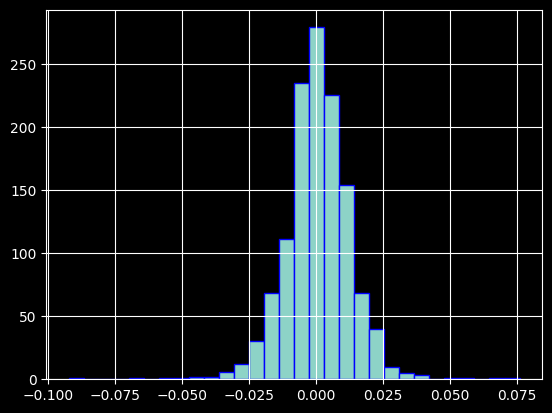

In [13]:
sbux['return'].hist(bins=30, edgecolor='b')

In [14]:
sbux['return'].mean(), sbux['return'].std()

(np.float64(0.0006002332205830914), np.float64(0.012360934026133879))

In [15]:
sbux['log_return'] = np.log(sbux['return'] + 1)

In [16]:
sbux

,date,open,high,low,close,volume,Name,prev_close,return,return2,log_return
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN,NaN,NaN
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080,-0.004080,-0.004089
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138,0.002138,0.002135
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643,-0.007643,-0.007672
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015,-0.005015,-0.005028
...,...,...,...,...,...,...,...,...,...,...,...
499406,2018-02-01,56.280,56.420,55.890,56.000,14690146,SBUX,56.810,-0.014258,-0.014258,-0.014361
499407,2018-02-02,55.900,56.320,55.700,55.770,15358909,SBUX,56.000,-0.004107,-0.004107,-0.004116
499408,2018-02-05,55.530,56.260,54.570,54.690,16059955,SBUX,55.770,-0.019365,-0.019365,-0.019555
499409,2018-02-06,53.685,56.060,53.560,55.610,17415065,SBUX,54.690,0.016822,0.016822,0.016682


<Axes: >

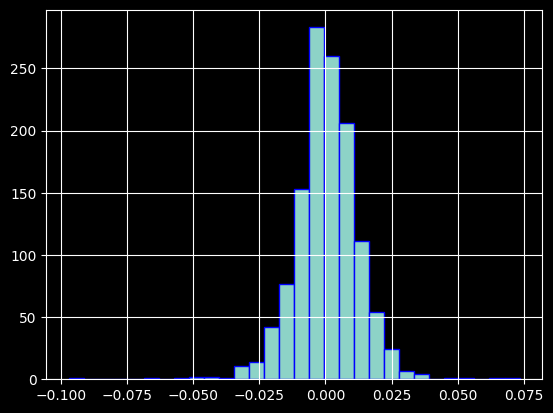

In [17]:
sbux['log_return'].hist(bins=30, edgecolor='b')

In [18]:
sbux['log_return'].mean(), sbux['return'].std()

(np.float64(0.0005235902748108682), np.float64(0.012360934026133879))

In [19]:
from scipy.stats import norm

In [20]:
x_list = np.linspace(
    sbux['return'].min(),
    sbux['return'].max(),
    100
)

In [21]:
y_list = norm.pdf(x_list, loc=sbux['return'].mean(), scale=sbux['return'].std())

<Axes: >

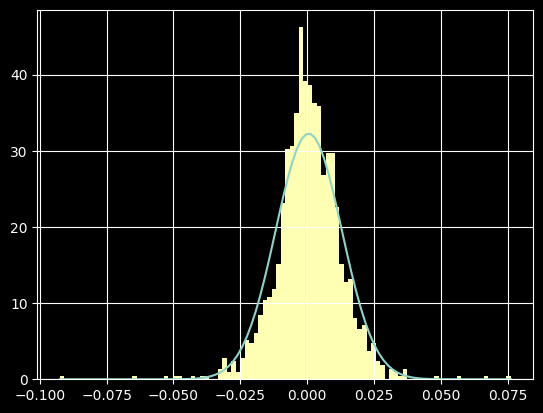

In [22]:
plt.plot(x_list, y_list)
sbux['return'].hist(bins=100, density=True)

In [23]:
from scipy.stats import probplot

((array([-3.26318411, -3.00291115, -2.85798028, ...,  2.85798028,
          3.00291115,  3.26318411]),
  array([-0.09243697, -0.06519128, -0.05321627, ...,  0.05617538,
          0.06623157,  0.0761332 ])),
 (np.float64(0.012069021175478523),
  np.float64(0.0006002332205830934),
  np.float64(0.974553608083022)))

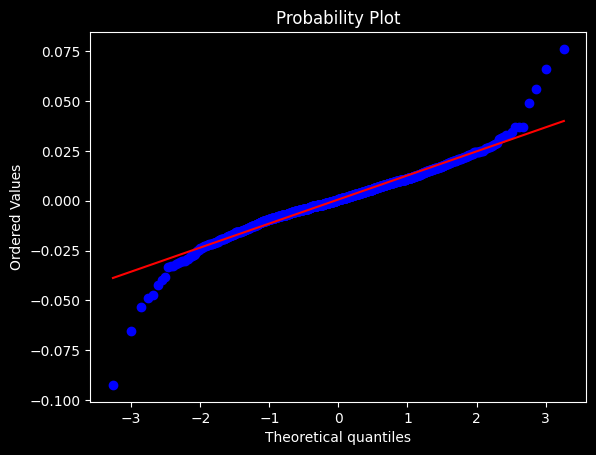

In [24]:
probplot(sbux['return'].dropna(), dist='norm', fit=True, plot=plt)

In [25]:
import statsmodels.api as sm

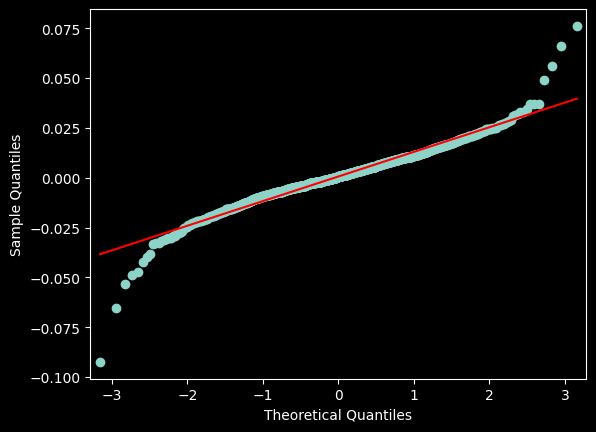

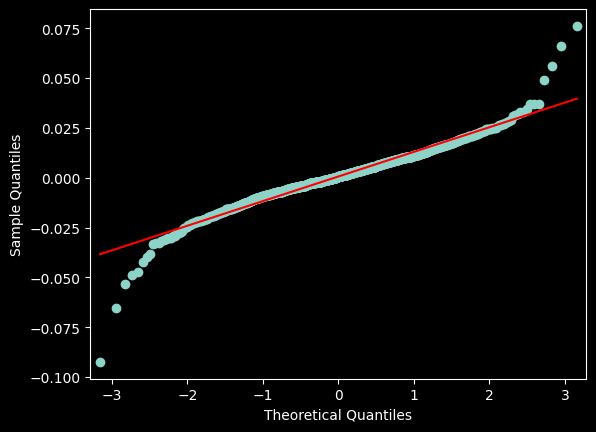

In [26]:
sm.qqplot(sbux['return'].dropna(), line='s')

In [27]:
from scipy.stats import t

In [28]:
x_list = np.linspace(
    sbux['return'].min(),
    sbux['return'].max(),
    100
)

In [29]:
params = t.fit(sbux['return'].dropna())

In [30]:
params

(np.float64(4.78753221828017),
 np.float64(0.0007108616716254146),
 np.float64(0.009341981642040986))

In [31]:
df, loc, scale = params

In [32]:
y_list = t.pdf(x_list, df, loc, scale)

<Axes: >

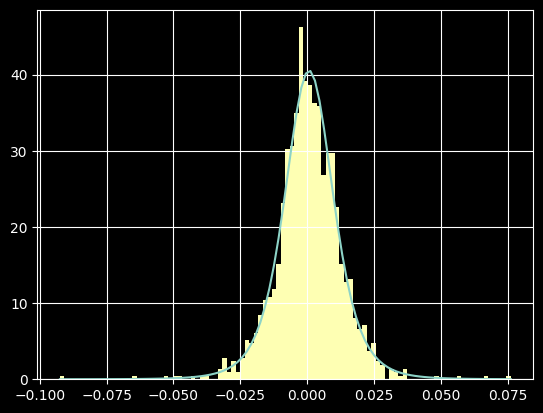

In [33]:
plt.plot(x_list, y_list)
sbux['return'].hist(bins=100, density=True)

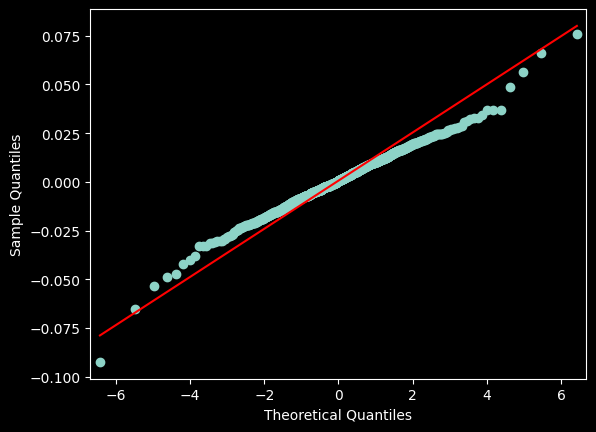

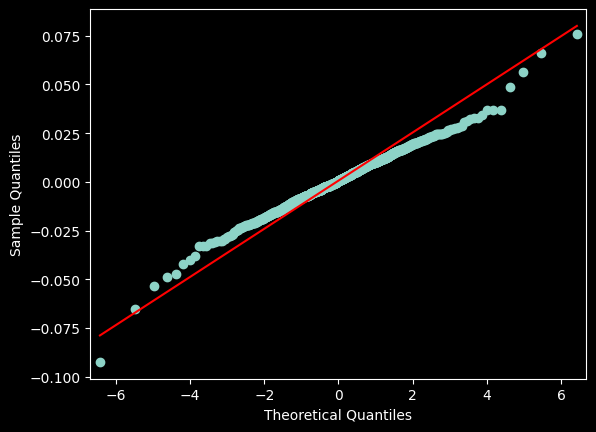

In [34]:
class myt:
    def __init__(self, df):
        self.df = df

    def fit(self, x):
        return t.fit(x)

    def ppf(self, x, loc=0, scale=1):
        return t.ppf(x, self.df, loc, scale)

sm.qqplot(sbux['return'].dropna(), dist=myt(df), line='s')

In [35]:
x_list = np.linspace(
    sbux['log_return'].min(),
    sbux['log_return'].max(),
    100
)

In [36]:
params = t.fit(sbux['log_return'].dropna())

In [37]:
df, loc, scale = params

In [38]:
y_list = t.pdf(x_list, df, loc, scale)

<Axes: >

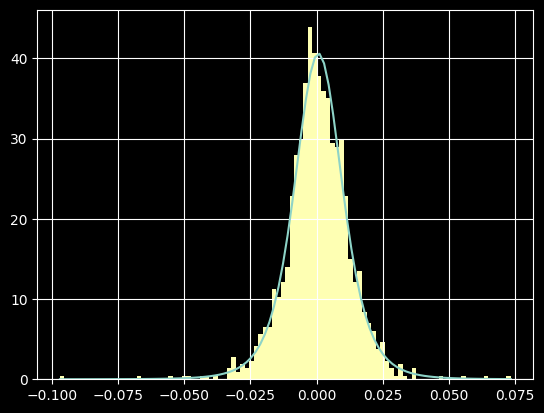

In [39]:
plt.plot(x_list, y_list)
sbux['log_return'].hist(bins=100, density=True)

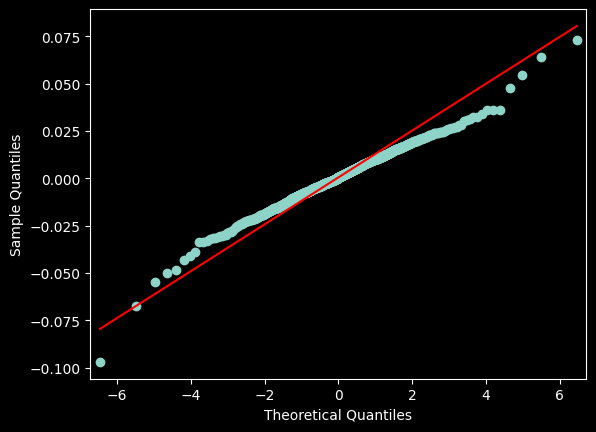

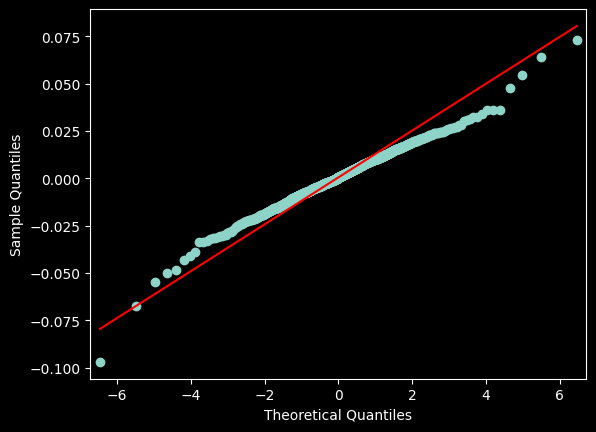

In [40]:
class myt:
    def __init__(self, df):
        self.df = df

    def fit(self, x):
        return t.fit(x)

    def ppf(self, x, loc=0, scale=1):
        return t.ppf(x, self.df, loc, scale)

sm.qqplot(sbux['log_return'].dropna(), dist=myt(df), line='s')

Confidence Interval

In [41]:
values = sbux['return'].dropna().to_numpy()

In [42]:
m = values.mean()
s = values.std()

In [43]:
low = m - 1.96 * s / np.sqrt(len(values))
high = m + 1.96 * s / np.sqrt(len(values))

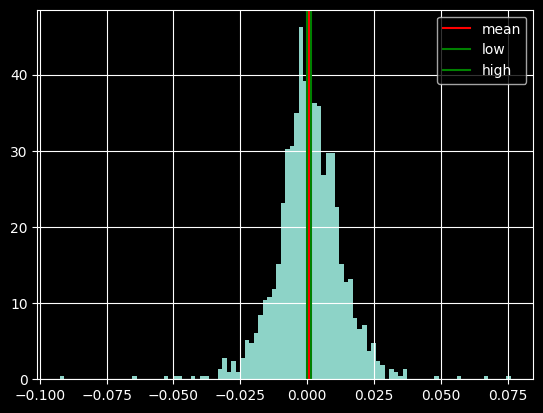

In [44]:
sbux['return'].hist(bins=100, density=True)
plt.axvline(m, label='mean', color='red')
plt.axvline(low, label='low', color='green')
plt.axvline(high, label='high', color='green')
plt.legend()

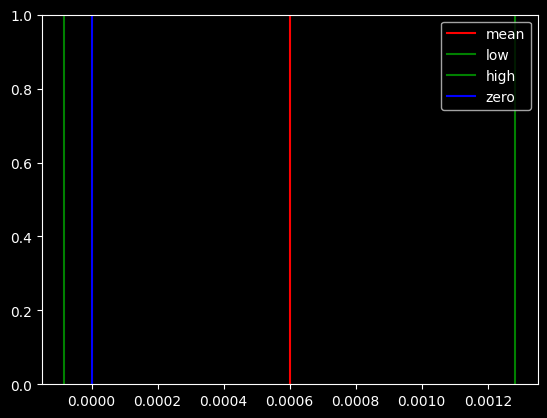

In [45]:
plt.axvline(m, label='mean', color='red')
plt.axvline(low, label='low', color='green')
plt.axvline(high, label='high', color='green')
plt.axvline(0, label='zero', color='blue')
plt.legend()

In [46]:
from scipy.stats import jarque_bera, normaltest

In [47]:
jarque_bera(values)

SignificanceResult(statistic=np.float64(1639.028438655224), pvalue=np.float64(0.0))

In [48]:
normaltest(values)

NormaltestResult(statistic=np.float64(172.6819672061636), pvalue=np.float64(3.181172790011964e-38))

In [49]:
jarque_bera(sbux['log_return'].dropna())

SignificanceResult(statistic=np.float64(1882.1814629047703), pvalue=np.float64(0.0))

In [50]:
normaltest(sbux['log_return'].dropna())

NormaltestResult(statistic=np.float64(198.54738937007733), pvalue=np.float64(7.690989175882069e-44))

In [51]:
from scipy.stats import kstest

In [52]:
df, loc, scale = t.fit(values)

def cdf(x):
    return t.cdf(x, df, loc, scale)

kstest(values, cdf)

KstestResult(statistic=np.float64(0.01887566203844726), pvalue=np.float64(0.7537785475444063), statistic_location=np.float64(-0.0003257859586252021), statistic_sign=np.int8(1))

In [53]:
df, loc, scale = t.fit(sbux['log_return'].dropna())
def cdf(x):
    return t.cdf(x, df, loc, scale)

kstest(values, cdf)

KstestResult(statistic=np.float64(0.018377769605553596), pvalue=np.float64(0.7819492804308994), statistic_location=np.float64(-0.0003257859586252021), statistic_sign=np.int8(1))

Covariance and Correlation

In [55]:
close = pd.read_csv('sp500_close.csv')

In [56]:
test = pd.DataFrame()
test['names'] = close.columns
test

,names
0,Unnamed: 0
1,AAL
2,AAPL
3,AAP
4,ABBV
...,...
501,XYL
502,YUM
503,ZBH
504,ZION


975

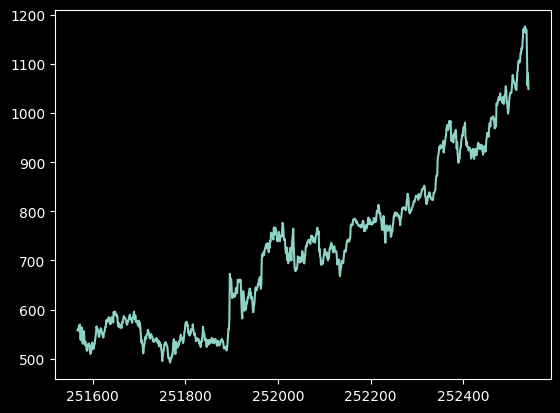

In [57]:
goog = data[data['Name'] == 'GOOG']
goog['close'].plot()
len(goog)

In [58]:
symbols = ['AAPL', 'GOOG', 'IBM', 'NFLX', 'SBUX']
sub = close[symbols].copy()

In [59]:
sub.dropna(axis=0, how='all', inplace=True)

In [60]:
sub

,AAPL,GOOG,IBM,NFLX,SBUX
0,67.8542,NaN,201.68,25.8528,28.185
3,68.5614,NaN,200.16,25.4128,28.070
4,66.8428,NaN,200.04,25.4214,28.130
5,66.7156,NaN,200.09,26.6098,27.915
6,66.6556,NaN,199.65,26.7714,27.775
...,...,...,...,...,...
1819,167.7800,1167.70,162.40,265.0700,56.000
1820,160.5000,1111.90,159.03,267.4300,55.770
1823,156.4900,1055.80,152.53,254.2600,54.690
1824,163.0300,1080.60,155.34,265.7200,55.610


In [61]:
for symbol in symbols:
    sub[symbol + '_prev'] = sub[symbol].shift(1)
    sub[symbol + '_ret'] = sub[symbol] / sub[symbol + '_prev'] - 1

In [62]:
rets = sub[[symbol + '_ret' for symbol in symbols]].copy()

In [63]:
rets

,AAPL_ret,GOOG_ret,IBM_ret,NFLX_ret,SBUX_ret
0,NaN,NaN,NaN,NaN,NaN
3,0.010422,NaN,-0.007537,-0.017019,-0.004080
4,-0.025067,NaN,-0.000600,0.000338,0.002138
5,-0.001903,NaN,0.000250,0.046748,-0.007643
6,-0.000899,NaN,-0.002199,0.006073,-0.005015
...,...,...,...,...,...
1819,0.002090,-0.001915,-0.007941,-0.019349,-0.014258
1820,-0.043390,-0.047786,-0.020751,0.008903,-0.004107
1823,-0.024984,-0.050454,-0.040873,-0.049247,-0.019365
1824,0.041792,0.023489,0.018423,0.045072,0.016822


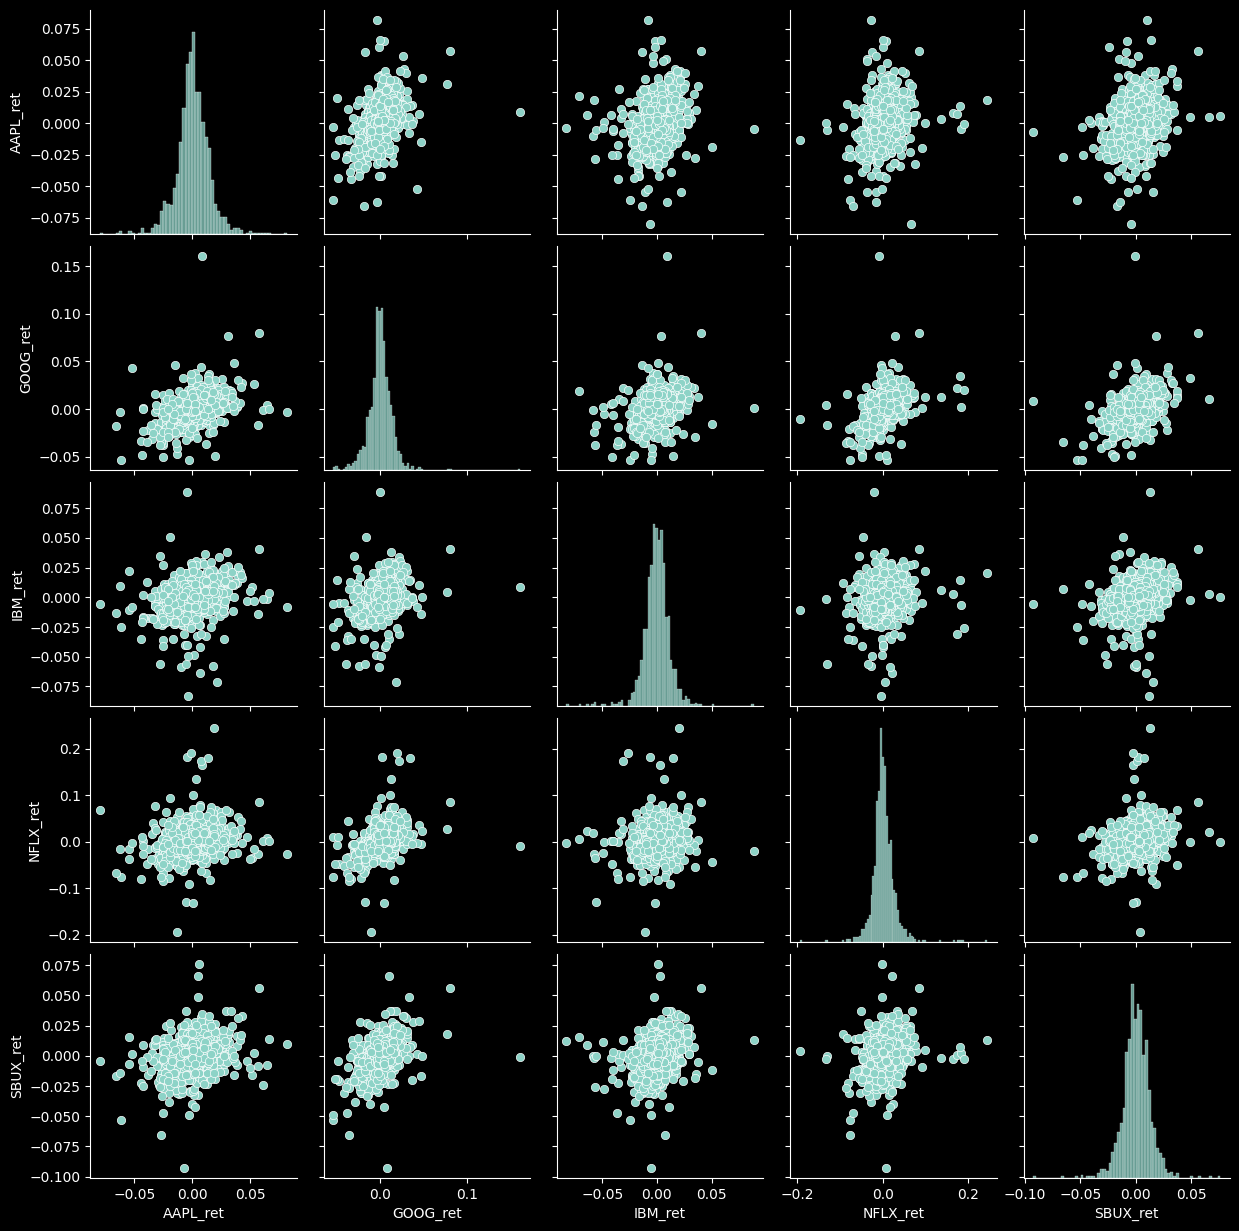

In [64]:
import seaborn as sns
sns.pairplot(rets)

In [65]:
rets.mean()

AAPL_ret    0.000786
GOOG_ret    0.000745
IBM_ret    -0.000144
NFLX_ret    0.002217
SBUX_ret    0.000600
dtype: float64

In [66]:
rets.std()

AAPL_ret    0.014593
GOOG_ret    0.014069
IBM_ret     0.011876
NFLX_ret    0.027353
SBUX_ret    0.012361
dtype: float64

Text(0, 0.5, 'Returns')

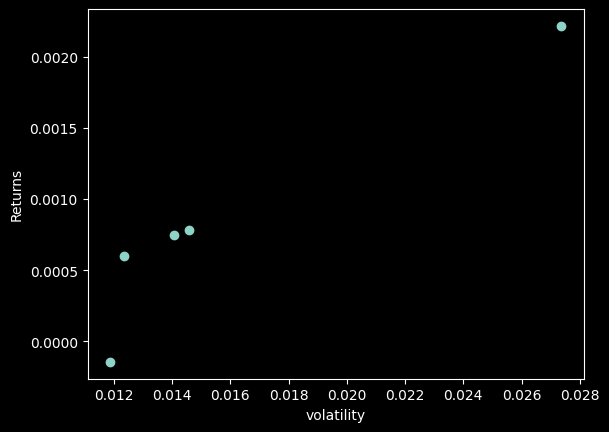

In [67]:
plt.scatter(rets.std(), rets.mean())
plt.xlabel('volatility')
plt.ylabel('Returns')

<Axes: >

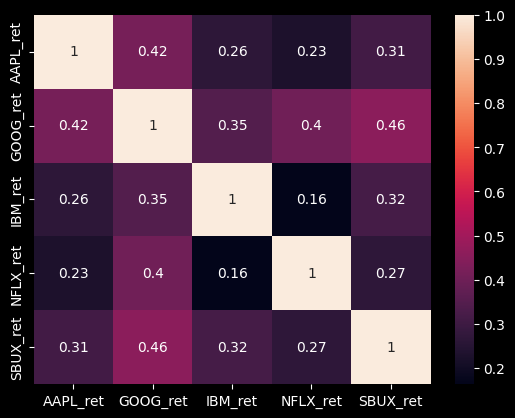

In [68]:
corr_matrix = rets.corr()
sns.heatmap(corr_matrix, annot=True)

<Axes: >

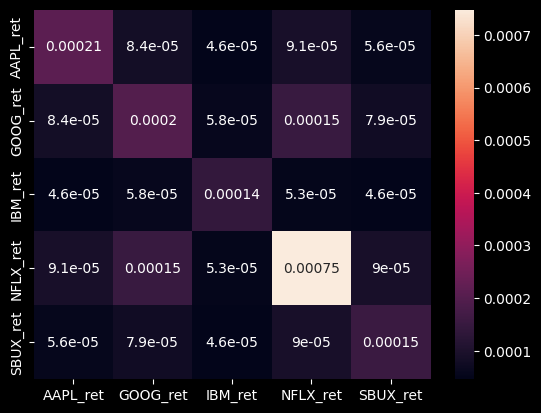

In [69]:
cov_matrix = rets.cov()
sns.heatmap(cov_matrix, annot=True)

Alpha And Beta

In [71]:
spy = pd.read_csv('SPY.csv', index_col=0, parse_dates=True)
spy.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002,92.246048,118944600
2010-01-05,113.260002,113.680000,112.849998,113.629997,92.490204,111579900
2010-01-06,113.519997,113.989998,113.430000,113.709999,92.555328,116074400
2010-01-07,113.500000,114.330002,113.180000,114.190002,92.946060,131091100
2010-01-08,113.889999,114.620003,113.660004,114.570000,93.255348,126402800


In [72]:
spy['SPY'] = spy['Close'].pct_change()

In [76]:
index = pd.read_csv('sp500sub.csv', index_col=0, parse_dates=True)
index.head()

,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2010-01-04,9.22,9.51,9.17,9.50,9.50,1865400.0,INCY
2010-01-05,9.51,10.29,9.45,10.27,10.27,7608900.0,INCY
2010-01-06,10.38,11.09,10.35,11.00,11.00,8046700.0,INCY
2010-01-07,11.00,11.06,10.62,10.82,10.82,3680300.0,INCY
2010-01-08,10.82,11.00,10.75,10.94,10.94,1529300.0,INCY


In [77]:
aapl = index[index['Name'] == 'AAPL'].copy()

In [78]:
aapl['AAPL'] = aapl['Close'].pct_change()

In [79]:
joined = aapl[['AAPL']].join(spy['SPY'])

In [80]:
joined.head()

,AAPL,SPY
Date,,
2010-01-04,NaN,NaN
2010-01-05,0.001729,0.002647
2010-01-06,-0.015906,0.000704
2010-01-07,-0.001849,0.004221
2010-01-08,0.006648,0.003328


<Axes: xlabel='Date'>

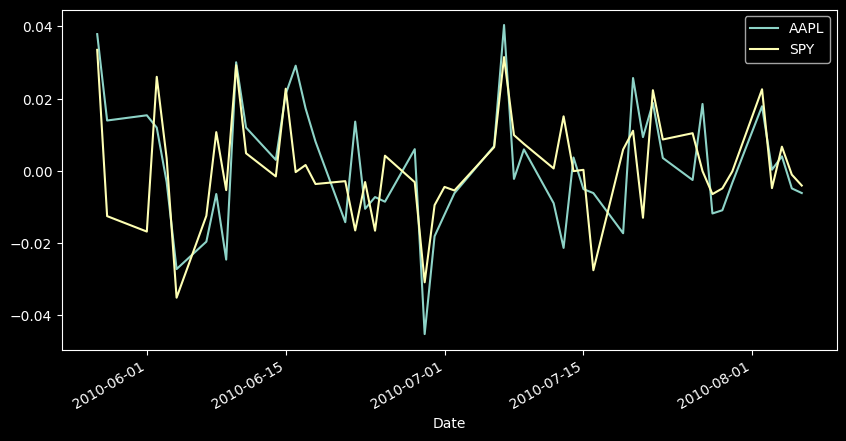

In [81]:
joined.iloc[100:150].plot(figsize=(10,5))

In [82]:
joined.dropna(inplace=True)
x = joined[['SPY']].to_numpy()
y = joined[['AAPL']].to_numpy()

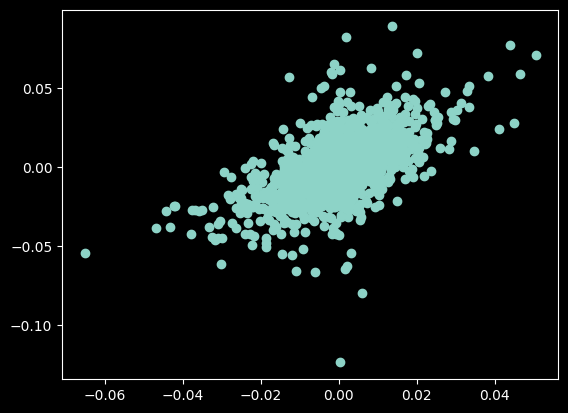

In [83]:
plt.scatter(x, y)

In [84]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x, y)

LinearRegression()

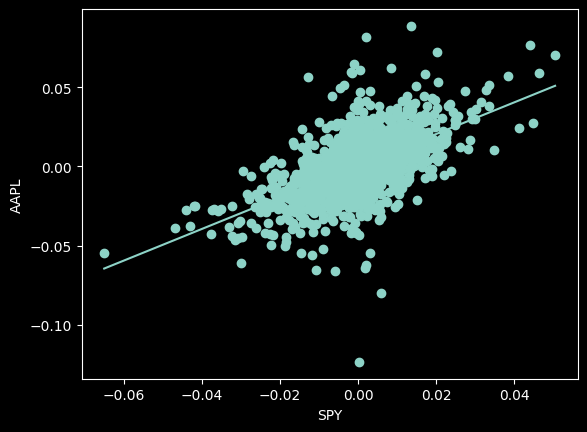

In [85]:
x_pred = np.linspace(x.min(), x.max(), 5).reshape(-1, 1)
y_pred =  model.predict(x_pred)

plt.scatter(x, y)
plt.xlabel('SPY')
plt.ylabel('AAPL')
plt.plot(x_pred, y_pred)

In [86]:
beta = model.coef_
alpha = model.intercept_
alpha, beta

(array([0.00046298]), array([[0.99836387]]))

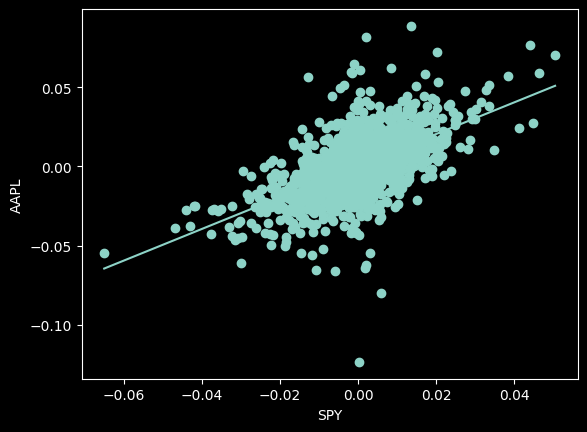

In [87]:
y_pred = beta* x_pred + alpha
plt.scatter(x, y)
plt.xlabel('SPY')
plt.ylabel('AAPL')
plt.plot(x_pred, y_pred)

In [88]:
joined.std()

AAPL    0.016201
SPY     0.009430
dtype: float64

Mixture of Gaussians

In [89]:
from sklearn.mixture import GaussianMixture

In [90]:
data = sbux['log_return'].dropna().to_numpy().reshape(-1, 1)
model = GaussianMixture(n_components=2)
model.fit(data)

GaussianMixture(n_components=2)

In [91]:
weights = model.weights_
mean = model.means_
cov = model.covariances_
print("Weighs" , weights, "\n")
print("Mean" , mean, "\n")
print("Variances" , cov, "\n")

Weighs [0.61807517 0.38192483] 

Mean [[ 0.00114856]
 [-0.00048781]] 

Variances [[[6.51181870e-05]]

 [[2.96637119e-04]]] 



In [92]:
means = mean.flatten()
var = cov.flatten()

In [93]:
x_list = np.linspace(data.min(), data.max(), 100)
fx0 = norm.pdf(x_list, mean[0], np.sqrt(var[0]))
fx1 = norm.pdf(x_list, mean[1], np.sqrt(var[1]))
fx = weights[0] * fx0 + weights[1] * fx1

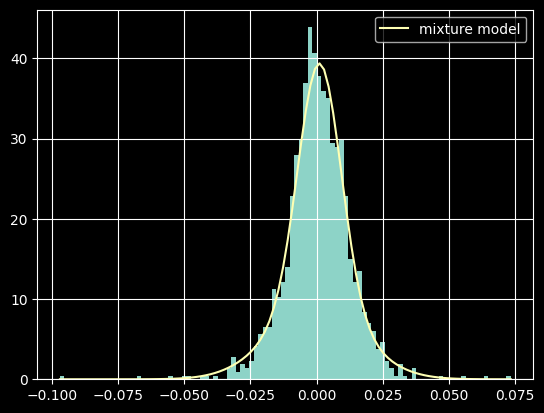

In [94]:
sbux['log_return'].hist(bins=100, density=True)
plt.plot(x_list, fx, label='mixture model')
plt.legend()

Price Simulation

In [95]:
df, loc, scale = t.fit(sbux['return'].dropna())
p0 = sbux.iloc[-1]['close']
prices = [p0]
returns = sbux['return'].dropna()
for _ in range(100):
    r = t.rvs(df, loc, scale)
    p = prices[-1] * (1 + r)
    prices.append(p)

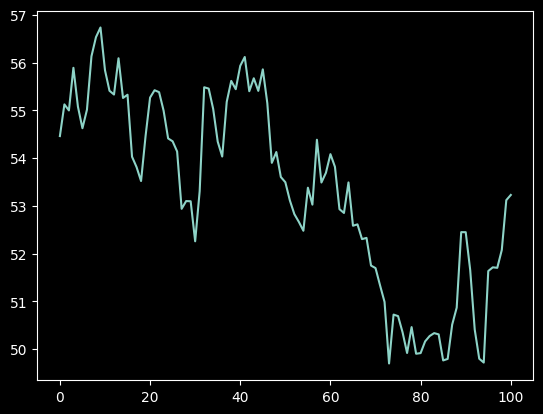

In [96]:
plt.plot(prices)

SMA

In [97]:
close = pd.read_csv('sp500_close.csv', index_col=0, parse_dates=True)

In [98]:
goog = close[['GOOG']].copy().dropna()

<Axes: >

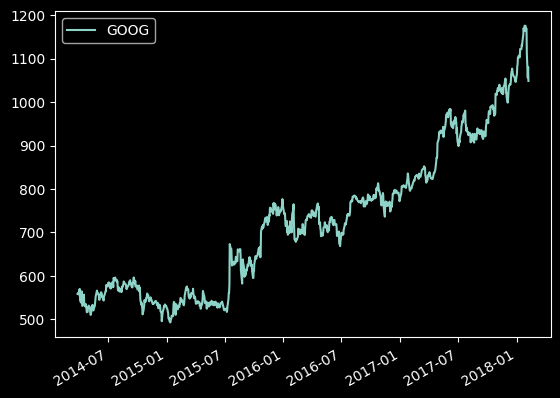

In [99]:
goog.plot()

In [100]:
goog_ret = np.log(goog.pct_change(1) + 1)

<Axes: >

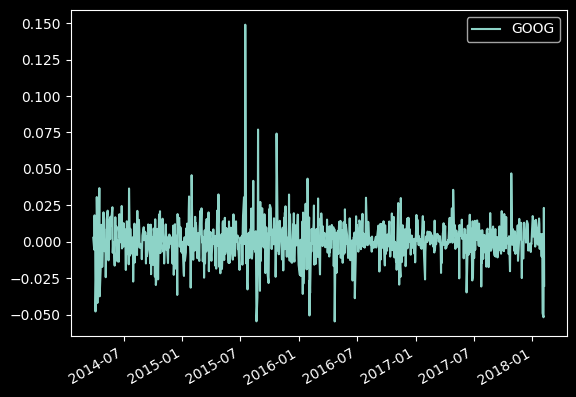

In [101]:
goog_ret.plot()

In [102]:
goog['SMA-10'] = goog['GOOG'].rolling(10).mean()

<Axes: >

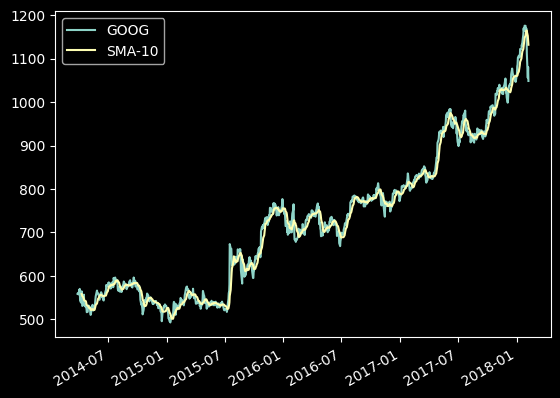

In [103]:
goog.plot()

In [104]:
goog['SMA-50'] = goog['GOOG'].rolling(50).mean()

<Axes: >

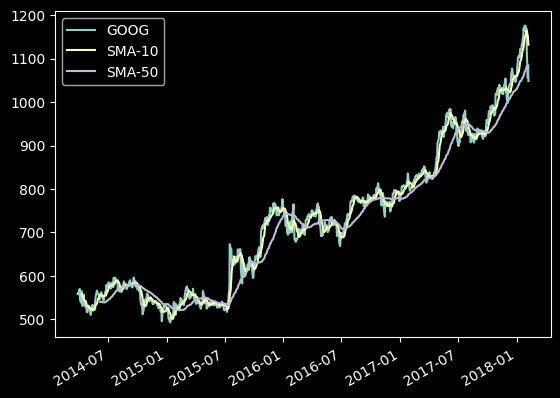

In [105]:
goog.plot()

EWMA and Holt-Winters

In [107]:
df = pd.read_csv('airline_passengers.csv', index_col='Month', parse_dates=True)

In [108]:
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<Axes: xlabel='Month'>

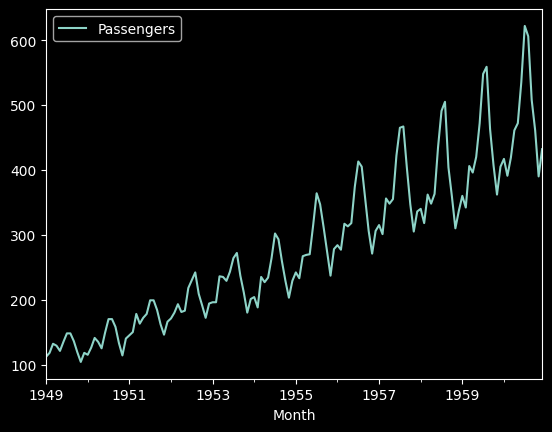

In [109]:
df.plot()

In [110]:
alpha=0.2

In [111]:
df['ewma'] = df['Passengers'].ewm(alpha=alpha, adjust=False).mean()

<Axes: xlabel='Month'>

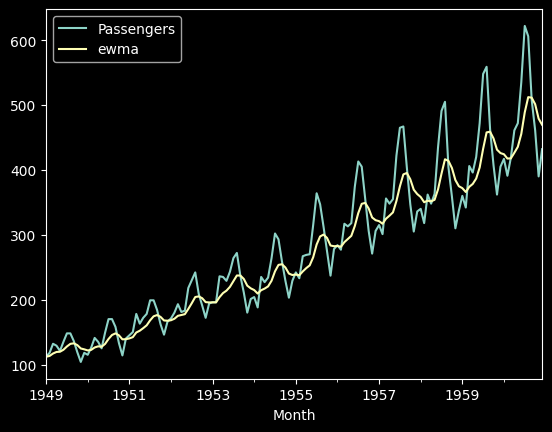

In [112]:
df.plot()

In [113]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [114]:
ses = SimpleExpSmoothing(df['Passengers'])

/opt/anaconda3/envs/myenv2/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [115]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [116]:
df.index.freq = 'MS'

In [117]:
ses= SimpleExpSmoothing(df['Passengers'])

In [118]:
res = ses.fit(smoothing_level=alpha, optimized=False)

In [119]:
res

In [120]:
res.predict(start=df.index[0], end=df.index[-1])

Month
1949-01-01    112.000000
1949-02-01    112.000000
1949-03-01    113.200000
1949-04-01    116.960000
1949-05-01    119.368000
                 ...    
1960-08-01    488.767616
1960-09-01    512.214093
1960-10-01    511.371274
1960-11-01    501.297019
1960-12-01    479.037615
Freq: MS, Length: 144, dtype: float64

In [121]:
df['SES'] = res.predict(start=df.index[0], end=df.index[-1])

In [122]:
np.allclose(df['SES'], res.fittedvalues)

True

<Axes: xlabel='Month'>

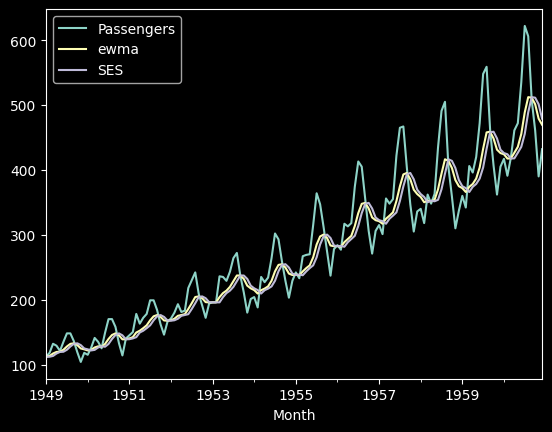

In [123]:
df.plot()

In [124]:
df.head()

,Passengers,ewma,SES
Month,,,
1949-01-01,112,112.0000,112.000
1949-02-01,118,113.2000,112.000
1949-03-01,132,116.9600,113.200
1949-04-01,129,119.3680,116.960
1949-05-01,121,119.6944,119.368


In [125]:
df['SES-1'] = df['SES'].shift(-1)

<Axes: xlabel='Month'>

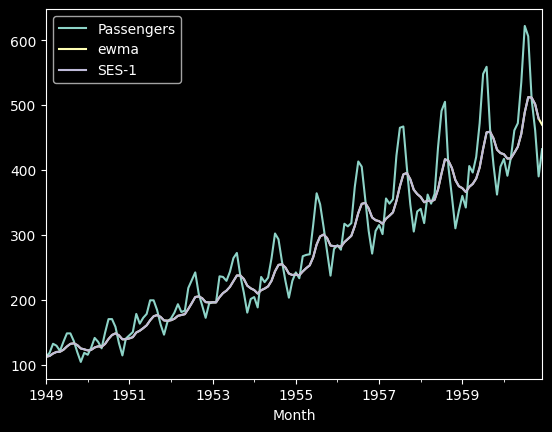

In [126]:
df[['Passengers', 'ewma', 'SES-1']].plot()

In [127]:
N_test = 12
train = df.iloc[:-N_test]
test =  df.iloc[-N_test:]

In [128]:
ses = SimpleExpSmoothing(train['Passengers'])
res = ses.fit()

<Axes: xlabel='Month'>

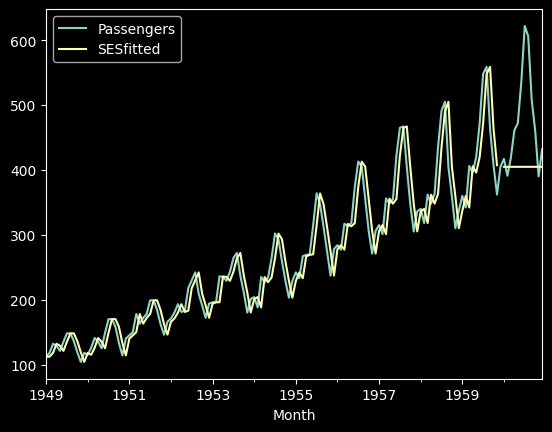

In [129]:
df.loc[:df.index[-N_test-1], 'SESfitted'] = res.fittedvalues
df.loc[df.index[-N_test-1]:, 'SESfitted'] = res.forecast(N_test)
df[['Passengers', 'SESfitted']].plot()

In [130]:
res.params

{'smoothing_level': np.float64(0.995),
 'smoothing_trend': np.float64(nan),
 'smoothing_seasonal': np.float64(nan),
 'damping_trend': nan,
 'initial_level': np.float64(112.0),
 'initial_trend': np.float64(nan),
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [131]:
from statsmodels.tsa.holtwinters import Holt

In [132]:
holt = Holt(df['Passengers'])

In [133]:
res_h = holt.fit()

In [134]:
df['Holt'] = res_h.fittedvalues

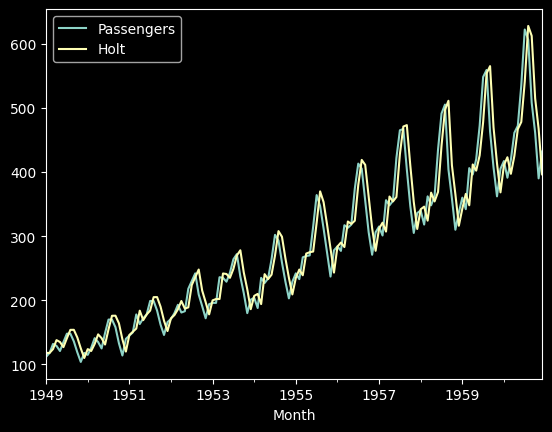

In [135]:
df[['Passengers', 'Holt']].plot();

<Axes: xlabel='Month'>

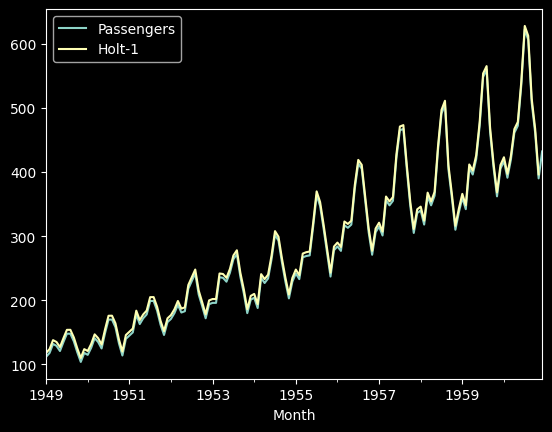

In [136]:
#### No!
df['Holt-1'] = df['Holt'].shift(-1)
df[['Passengers', 'Holt-1']].plot()

In [137]:
holt = Holt(train['Passengers'])
res_h = holt.fit()
df.loc[df.index[:-N_test], 'Holt'] = res_h.fittedvalues

In [138]:
df.loc[df.index[-N_test:], 'Holt'] = res_h.forecast(N_test)

<Axes: xlabel='Month'>

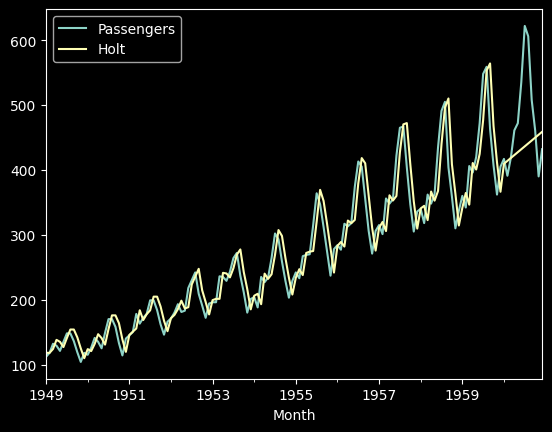

In [139]:
df[['Passengers', 'Holt']].plot()

In [140]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [141]:
hw = ExponentialSmoothing(train['Passengers'], \
                          trend='add', seasonal='add', seasonal_periods=12)

res_hw = hw.fit()

In [142]:
df.loc[df.index[:-N_test], 'HoltWinters'] = res_hw.fittedvalues

In [143]:
df.loc[df.index[-N_test:], 'HoltWinters'] = res_hw.forecast(N_test)

<Axes: xlabel='Month'>

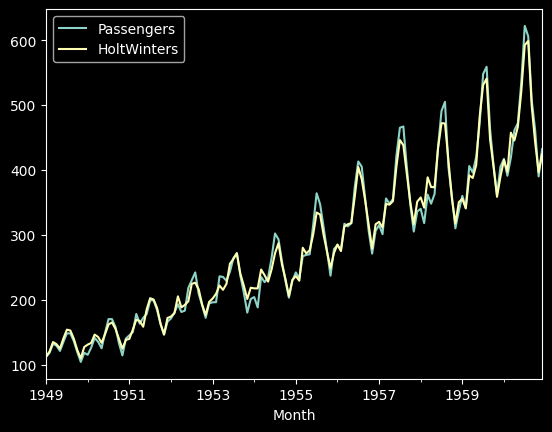

In [144]:
df[['Passengers', 'HoltWinters']].plot()

In [145]:
def rmse(y, t):
    return np.sqrt(np.mean((y - t) ** 2))

In [146]:
def mae(y, t):
    return np.mean(np.abs(y - t))

In [147]:
print('Train RMSE : ', rmse(train['Passengers'], res_hw.fittedvalues))
print('Test RMSE : ', rmse(test['Passengers'], res_hw.forecast(N_test)))

Train RMSE :  11.624680172680014
Test RMSE :  16.97983216134184


In [148]:
print('Train MSE: ', mae(train['Passengers'], res_hw.fittedvalues))
print('Test MSE: ', mae(test['Passengers'], res_hw.forecast(N_test)))

Train MSE:  9.008022031730231
Test MSE:  13.380351392616783


In [149]:
hw = ExponentialSmoothing(train['Passengers'], \
                        trend='add', seasonal='mul', seasonal_periods=12)

res_hw = hw.fit()

In [150]:
df.loc[df.index[:-N_test], 'HoltWinters'] = res_hw.fittedvalues

In [151]:
df.loc[df.index[-N_test:], 'HoltWinters'] = res_hw.forecast(N_test)

<Axes: xlabel='Month'>

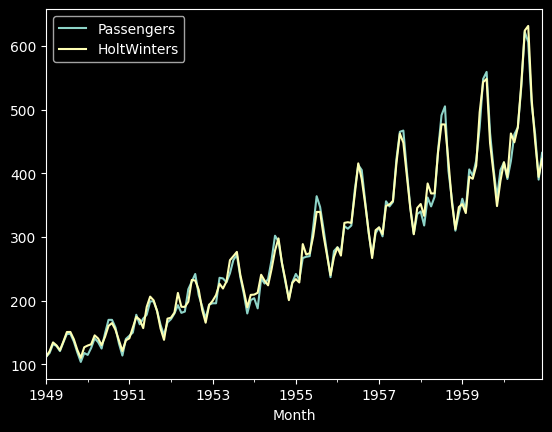

In [152]:
df[['Passengers', 'HoltWinters']].plot()

In [153]:
print('Train RMSE : ', rmse(train['Passengers'], res_hw.fittedvalues))
print('Test RMSE : ', rmse(test['Passengers'], res_hw.forecast(N_test)))

Train RMSE :  9.767995313739089
Test RMSE :  15.809796044573709


In [154]:
print('Train MSE: ', mae(train['Passengers'], res_hw.fittedvalues))
print('Test MSE: ', mae(test['Passengers'], res_hw.forecast(N_test)))

Train MSE:  7.6042124338796695
Test MSE:  10.302506683026635


/opt/anaconda3/envs/myenv2/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


<Axes: xlabel='Month'>

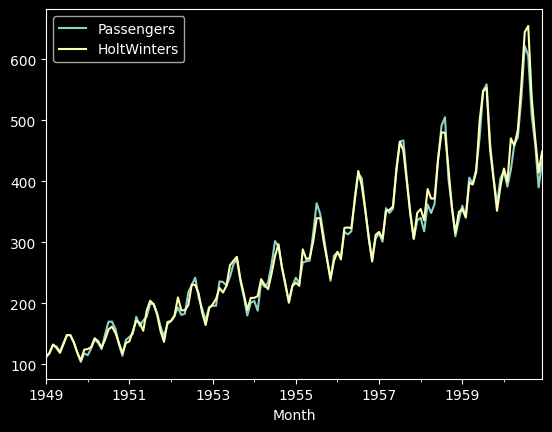

In [155]:
hw = ExponentialSmoothing(train['Passengers'], \
                        trend='mul', seasonal='mul', seasonal_periods=12)

res_hw = hw.fit()
df.loc[df.index[:-N_test], 'HoltWinters'] = res_hw.fittedvalues
df.loc[df.index[-N_test:], 'HoltWinters'] = res_hw.forecast(N_test)
df[['Passengers', 'HoltWinters']].plot()

In [156]:
print('Train RMSE : ', rmse(train['Passengers'], res_hw.fittedvalues))
print('Test RMSE : ', rmse(test['Passengers'], res_hw.forecast(N_test)))

Train RMSE :  9.61796090128341
Test RMSE :  25.807960685032903


In [157]:
print('Train MSE: ', mae(train['Passengers'], res_hw.fittedvalues))
print('Test MSE: ', mae(test['Passengers'], res_hw.forecast(N_test)))

Train MSE:  7.112342492669671
Test MSE:  20.845902175504108


ARIMA

In [158]:
df = pd.read_csv('airline_passengers.csv', index_col='Month', parse_dates=True)

In [159]:
df['lstdiff'] = df['Passengers'].diff()

<Axes: xlabel='Month'>

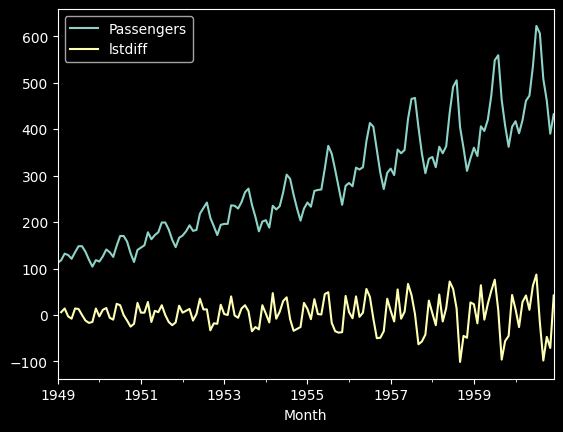

In [160]:
df.plot()

In [161]:
df['LogPassengers'] = np.log(df['Passengers'])

<Axes: xlabel='Month'>

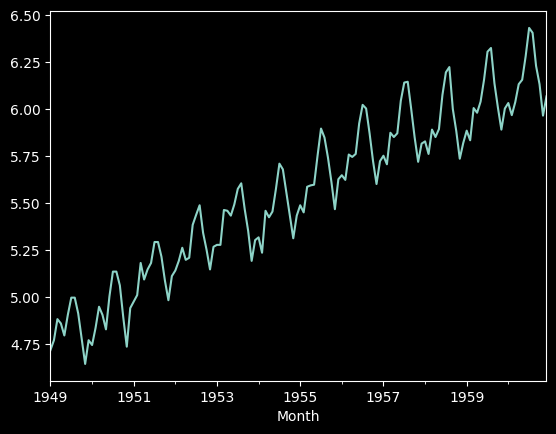

In [162]:
df['LogPassengers'].plot()

In [163]:
from statsmodels.tsa.arima.model import ARIMA

In [164]:
df.index.freq = 'MS'

Ntest = 12
train = df.iloc[:-N_test]
test = df.iloc[-N_test:]

In [165]:
arima = ARIMA(train['Passengers'], order=(1,0,0))

In [166]:
arima_result = arima.fit()

In [167]:
df.loc[:df.index[-Ntest-1], 'AR(1)'] = arima_result.predict(start=train.index[0], end=train.index[-1])

<Axes: xlabel='Month'>

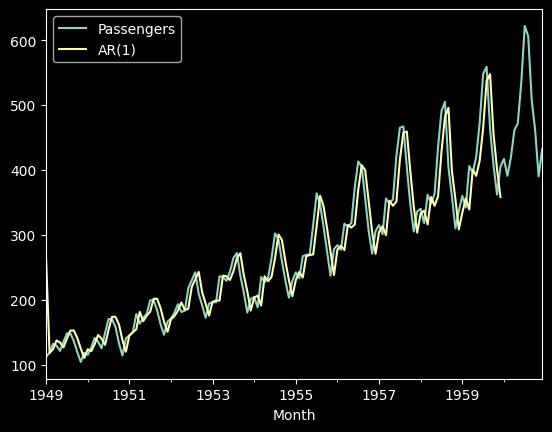

In [168]:
df[['Passengers', 'AR(1)']].plot()

In [169]:
forecast_result = arima_result.get_forecast(steps=Ntest)

forecast = forecast_result.predicted_mean
stderr = forecast_result.se_mean        
confint = forecast_result.conf_int()    

In [170]:
df.loc[df.index[-Ntest-1]:, 'AR(1)'] = forecast

<Axes: xlabel='Month'>

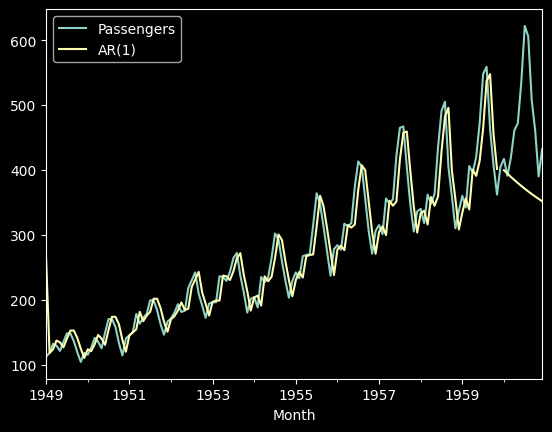

In [171]:
df[['Passengers', 'AR(1)']].plot()

In [172]:
import matplotlib.pyplot as plt

def plot_fit_and_forecast(result):
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(df['Passengers'], label='data')

    # Plot the curve fitted on the train set
    train_pred = result.fittedvalues
    ax.plot(train.index, train_pred, color='green', label='fitted')

    # Forecast the test set
    forecast_result = result.get_forecast(steps=Ntest)

    forecast = forecast_result.predicted_mean  # Forecasted values
    confint = forecast_result.conf_int()       # Confidence intervals

    # Plot forecast
    ax.plot(test.index, forecast, label='forecast')

    # Correct indexing for confidence intervals
    ax.fill_between(test.index, confint.iloc[:, 0], confint.iloc[:, 1], color='red', alpha=0.3)

    ax.legend()
    plt.show()


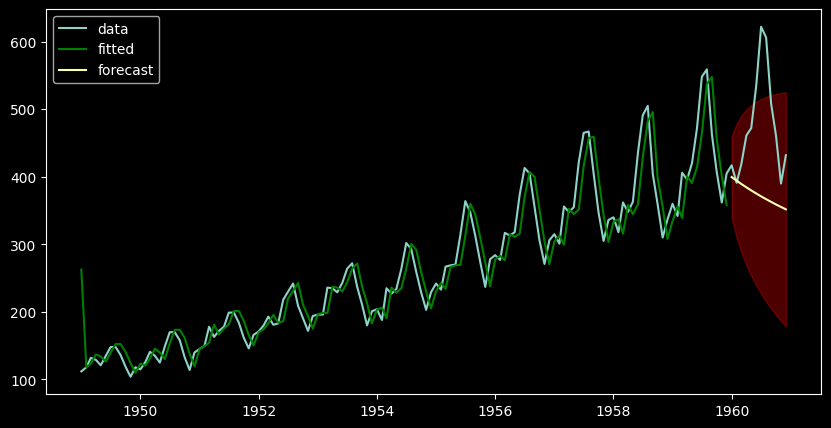

In [173]:
plot_fit_and_forecast(arima_result)

/opt/anaconda3/envs/myenv2/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/envs/myenv2/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


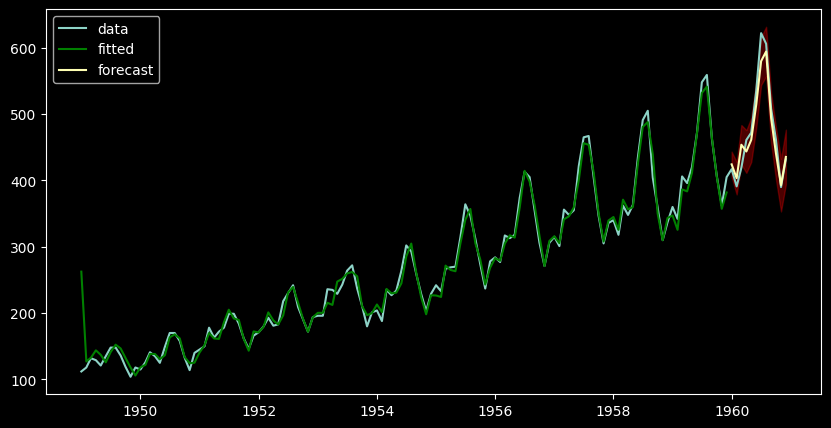

In [174]:
arima = ARIMA(train['Passengers'], order=(20,0,0))
arima_result = arima.fit()
plot_fit_and_forecast(arima_result)

/opt/anaconda3/envs/myenv2/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


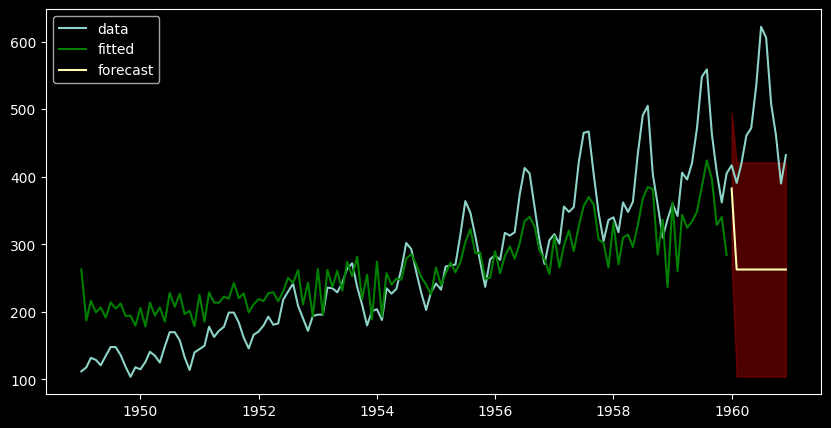

In [175]:
arima = ARIMA(train['Passengers'], order=(0,0,1))
arima_result = arima.fit()
plot_fit_and_forecast(arima_result)

In [176]:
df

,Passengers,lstdiff,LogPassengers,AR(1)
Month,,,,
1949-01-01,112,NaN,4.718499,262.490027
1949-02-01,118,6.0,4.770685,117.750054
1949-03-01,132,14.0,4.882802,123.520801
1949-04-01,129,-3.0,4.859812,136.985876
1949-05-01,121,-8.0,4.795791,134.100503
...,...,...,...,...
1960-08-01,606,-16.0,6.406880,366.839774
1960-09-01,508,-98.0,6.230481,362.852688
1960-10-01,461,-47.0,6.133398,359.017944


In [177]:
df['Log1stDiff'] = df['LogPassengers'].diff()

<Axes: xlabel='Month'>

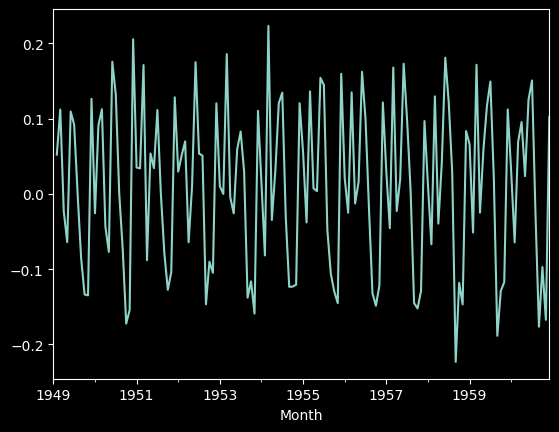

In [178]:
df['Log1stDiff'].plot()

In [179]:
arima = ARIMA(train['Passengers'], order=(8,1,1))
arima_result_811 = arima.fit()

def plot_fit_and_forecast_int(result, d, col='Passengers'):
    fig, ax = plt.subplots(figsize=(10,5))
    ax.plot(df[col], label='data')

    # # Plot the curve fitted on train set
    train_pred = result.predict(start = train.index[d], end=train.index[-1], \
        typ='level')
    ax.plot(train.index[d:], train_pred, color='green', label='fitted')

    # Forecast the test set
    forecast_result = result.get_forecast(steps=Ntest)

    forecast = forecast_result.predicted_mean
    stderr = forecast_result.se_mean    
    confint = forecast_result.conf_int()
    ax.plot(test.index, forecast, label='forecast')
    ax.fill_between(test.index, \
        confint.iloc[:,0], confint.iloc[:,1], \
            color='red', alpha=0.3)
    ax.legend()

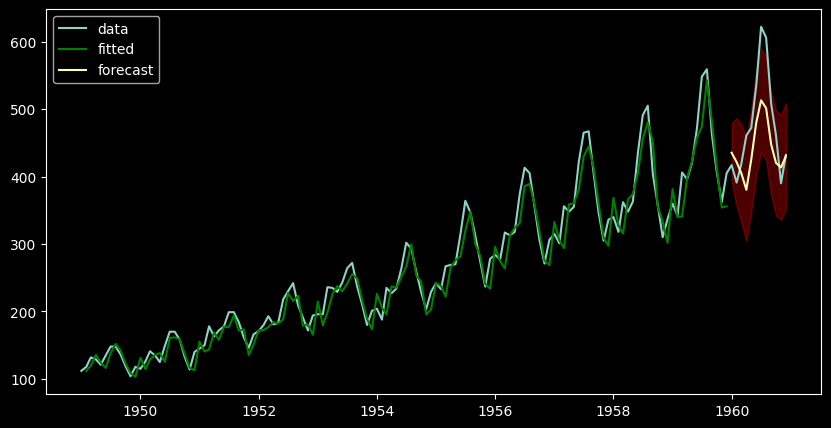

In [180]:
plot_fit_and_forecast_int(arima_result_811,1)

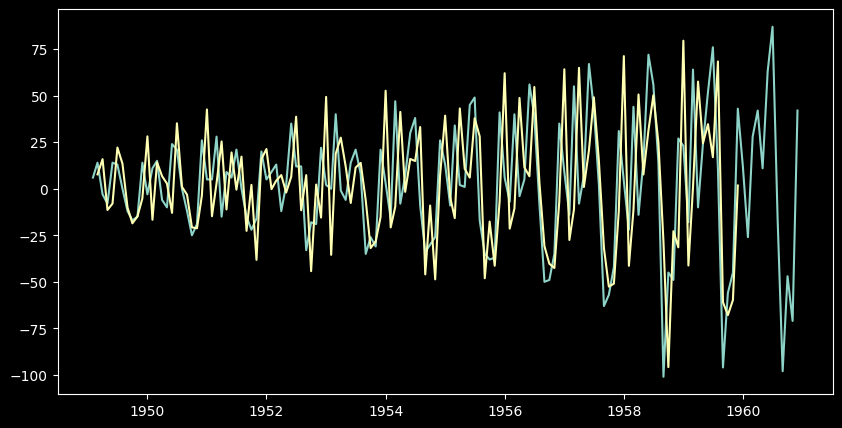

In [181]:
def plot_difference(result,d, col='Passengers'):
    train_pred = result.predict(start=train.index[d], end=train.index[-1])
    diff = df[col].diff()
    fig, ax = plt.subplots(figsize=(10,5))
    ax.plot(diff, label='true 1st difference')
    ax.plot(train_pred.diff(), label='fitted 1st difference')

plot_difference(arima_result_811,1)

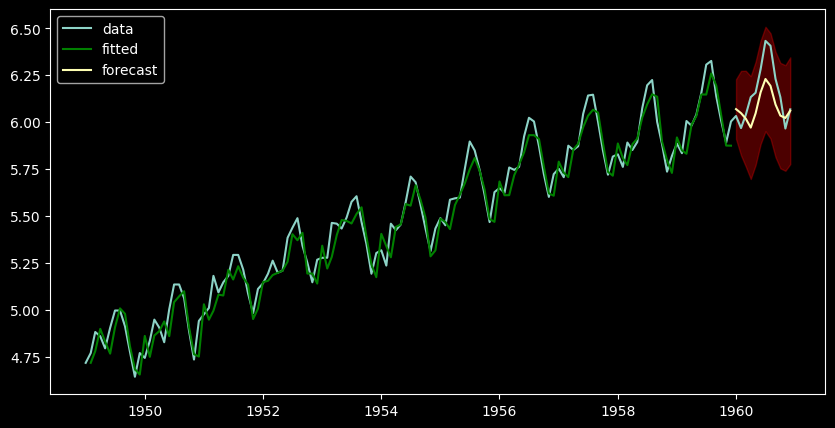

In [183]:
arima = ARIMA(train['LogPassengers'], order=(8,1,1))
arima_result_log811 = arima.fit()
plot_fit_and_forecast_int(arima_result_log811, 1, col='LogPassengers')

In [184]:
def rmse(result, is_logged):
    # Forecast the test set
    forecast_result = result.get_forecast(steps=Ntest)

    forecast = forecast_result.predicted_mean
    stderr = forecast_result.se_mean    
    confint = forecast_result.conf_int()
    
    if is_logged:
        forecast = np.exp(forecast)
        
    t = test['Passengers']
    y = forecast
    return np.squeeze(np.mean(t-y) ** 2)

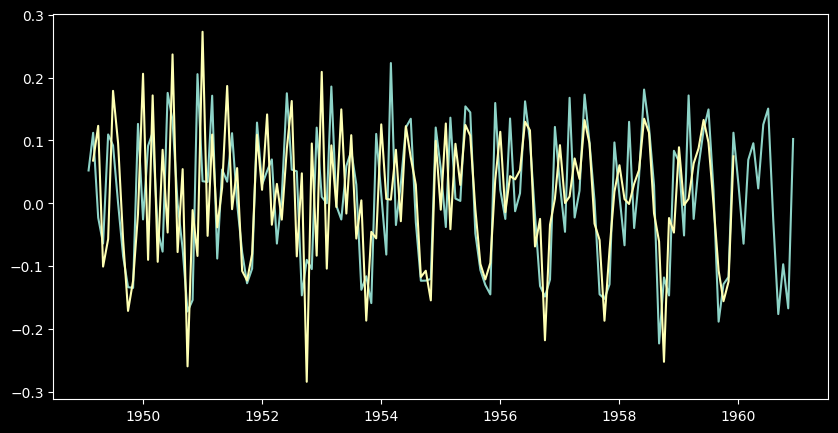

In [195]:
plot_difference(arima_result_log811,1,col='LogPassengers')

In [196]:
print('ARIMA(8,1,1): ', rmse(arima_result_811, False))

ARIMA(8,1,1):  1351.324317012245


/opt/anaconda3/envs/myenv2/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


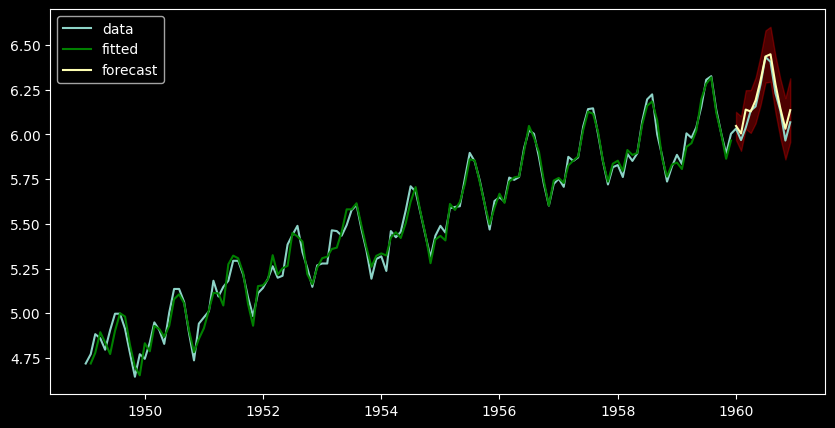

In [199]:
arima = ARIMA(train['LogPassengers'], order=(12,1,1))
arima_result_log1210 = arima.fit()
plot_fit_and_forecast_int(arima_result_log1210, 1, col='LogPassengers')

In [202]:
def rmse(result, is_logged):
    # Forecast the test set
    forecast_result = result.get_forecast(steps=Ntest)

    forecast = forecast_result.predicted_mean
    stderr = forecast_result.se_mean    
    confint = forecast_result.conf_int()
    
    if is_logged:
        forecast = np.exp(forecast)
        
    t = test['Passengers']
    y = forecast
    return np.squeeze(np.mean(t-y) ** 2)

In [204]:
print(rmse(arima_result_811, False))
print(rmse(arima_result_log811, True))
print(rmse(arima_result_log1210, True))

1351.324317012245
1464.089817520605
298.691136852596
